In [10]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats

1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [11]:
N=100
seed=1
np.random.seed(seed)
x = np.random.normal(loc=0,
                     scale=1,
                     size=N)

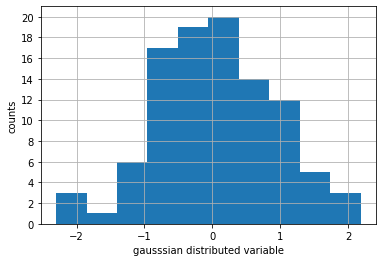

In [12]:
counts, bin_edges = np.histogram(x, int(np.sqrt(N)))
plt.hist(x,bins=int(np.sqrt(N)))

plt.yticks(np.arange(0, np.amax(counts)+2, 2))
plt.ylabel('counts')
plt.xlabel('gausssian distributed variable')
plt.grid()
plt.show()

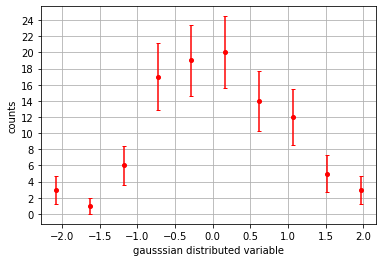

In [13]:
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.
poiss_err = np.sqrt(counts)
plt.errorbar(bin_centres,
             counts,
             yerr=poiss_err,
             fmt='o',
             capsize=2,
             ms=4,
             color='red')
plt.yticks(np.arange(0, np.amax(counts)+ math.ceil(np.amax(poiss_err)), 2))
plt.ylabel('counts')
plt.xlabel('gausssian distributed variable')
plt.grid()
plt.show()

In [14]:
means = x
std = 1.06 * x.std() * x.size**(-1/5)

print(x.min(),x.max())

t = np.linspace(x.min(),x.max(), 300)
gaussians=stats.norm.pdf(t[:,None], loc=means, scale=std).T

-2.3015386968802827 2.1855754065331614


(0.0, 1.121433633620274)

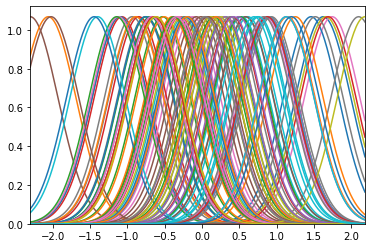

In [15]:
for i in gaussians:
    plt.plot(t, i)
    
plt.xlim(x.min(), x.max())
plt.ylim(0)

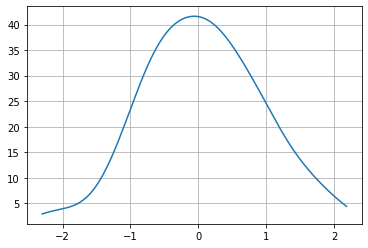

In [16]:
tot_gaus= np.sum(gaussians, axis=0)

plt.plot(t, tot_gaus)
plt.grid()
plt.show()

In [17]:
from scipy.integrate import trapz

In [18]:
int_x = trapz(x)
int_gaus = trapz(tot_gaus)

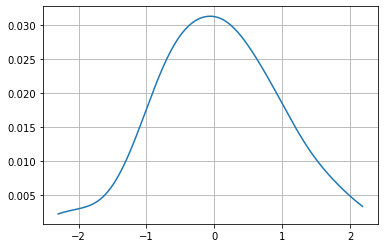

In [19]:
gaus_norm = int_x *tot_gaus/int_gaus
plt.plot(t, gaus_norm)
plt.grid()
plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2022-12-20 15:42:51--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [segue]
--2022-12-20 15:42:52--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://ucb7eed59265beb03095f4544e74.dl.dropboxusercontent.com/cd/0/inline/By8uwG7Iwat9HYPjI64ByXA7DQDHMrMISUVGY0HVr3lejZ96q2hm9I9-rRkb5fJF4Tz-5Ywtv2cbeITeZTb3RnMdbcVIXQkzhq4W4ZokMq9vavChP9xcvvvv94KeXcrncp-htnBuYmcsMOh7FF9ETl9qchf0mxTjxRgugNbu9n8xcg/file# [segue]
--2022-12-20 15:42:53--  https://ucb7eed59265beb03095f4544e74.dl.dropboxusercontent.com/cd/0/i

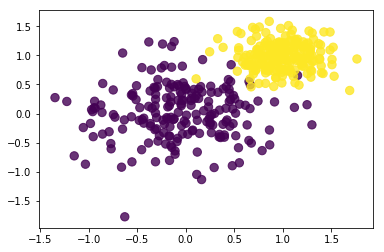

In [20]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

[]

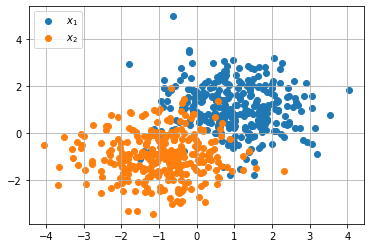

In [21]:
N = 300
mean1 = np.array([1,1])
mean2 = np.array([-1,-1])

cov = np.diag([1,1])

x1 = np.random.multivariate_normal(mean1, cov, size=N)
x2 = np.random.multivariate_normal(mean2, cov, size=N)

plt.scatter(x1[:,0], x1[:,1], label='$x_1$')
plt.scatter(x2[:,0], x2[:,1], label='$x_2$')

plt.grid()
plt.legend(loc='upper left')
plt.plot()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [22]:
!wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy

--2022-12-20 15:42:54--  https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: /s/raw/hgnvyj9abatk8g6/residuals_261.npy [segue]
--2022-12-20 15:42:55--  https://www.dropbox.com/s/raw/hgnvyj9abatk8g6/residuals_261.npy
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://ucaa853d3063cafb4460d174f050.dl.dropboxusercontent.com/cd/0/inline/By9Kmo8GUU9bnDx_Qj1rB67Kq__kcI4wSIu4w2PPqE_Z93KFXFUC7Db6Hr2oX8KuHgZpPzCy7bqDEDod57NukogVkAFJMtFuni9J3pKgKu_US7NWhLdwjd-yAI_es6Ub1WMpK0ArQwgK4T_EI_mkCWPnKN8c28yJ7x_PeJYp_MtLvg/file# [segue]
--2022-12-20 15:42:55--  https://ucaa853d3063cafb4460d174f050.dl.dropboxusercontent.com/cd/0/inline/By9Kmo8GUU9bnDx_Qj1rB67Kq__kcI4wSIu4

In [23]:
import pandas as pd
from scipy.stats import linregress

In [24]:
data = np.load('residuals_261.npy', allow_pickle=True).item()
df = pd.DataFrame(data)
df.head(10)

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
5,-11.020000,4.4
6,-2.270000,0.6
7,-2.160000,19.0
8,-0.042857,3.3
9,0.128571,5.3


In [25]:
cl_df = df[np.abs(df['residuals'])<2]

In [26]:
lmd = linregress(cl_df['distances'], cl_df['residuals'])

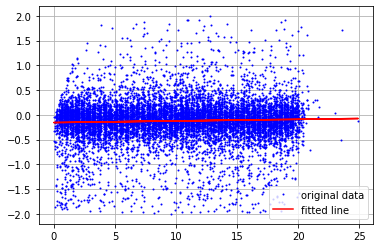

In [27]:
plt.plot(cl_df['distances'], cl_df['residuals'], 'o', label='original data', ms=1, color='blue')
plt.plot(cl_df['distances'], lmd.intercept + lmd.slope*cl_df['distances'], color='red', label='fitted line')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [3]:
import seaborn as sns 

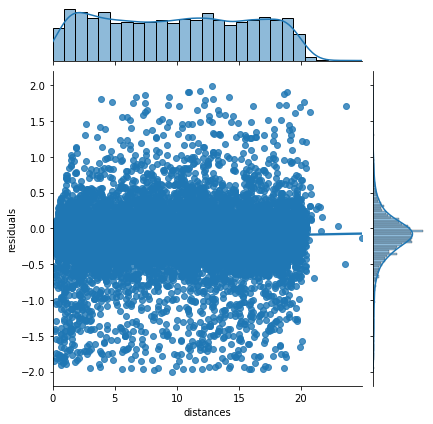

In [30]:
sns.jointplot(x="distances", y="residuals", data=cl_df, kind='reg');